In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
def pd_to_xr(df):
    return df.stack().to_xarray().assign_coords({'level_1': [1/(2*len(df.columns)) + i /len(df.columns) for i in range(len(df.columns))]})

In [3]:
pathlist = Path("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Germany_BfR_Corona_Monitor/BfR_data").glob('**/*.csv')
auswirkungen = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Germany_BfR_Corona_Monitor/BfR_data/Auswirkungen-Wahrgenommene Auswirkung auf die eigene Gesundheit Beunruhigung über die Auswirkungen auf die körperliche Gesundheit (ab 9. Juni 2020).csv", index_col=0)
auswirkungen.index = pd.to_datetime(auswirkungen.index, dayfirst=True)
kontrollierbarkeit = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Germany_BfR_Corona_Monitor/BfR_data/Kontrollierbarkeit-Wahrgenommene Kontrollierbarkeit des Ansteckungsrisikos.csv", index_col=0)
kontrollierbarkeit.index = pd.to_datetime(kontrollierbarkeit.index, dayfirst=True)
massnahmen = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Germany_BfR_Corona_Monitor/BfR_data/Schutzmassnahmen-Aktuelle Schutzmaßnahmen der Befragten (neue Kategorisierung ab 9. Juni 2020).csv", index_col=0)
massnahmen.index = pd.to_datetime(massnahmen.index, dayfirst=True)

concern_kr = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Gallup_Korea/Gallup_data/Concern-How concerned you are about getting COVID-19 yourself? (4-point scale).csv", index_col=0)
concern_kr.index = pd.to_datetime(concern_kr.index, dayfirst=True)
likelihood_kr = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Gallup_Korea/Gallup_data/Likelihood-Do you think you are likely or unlikely to get COVID-19? (4-point scale).csv", index_col=0)
likelihood_kr.index = pd.to_datetime(likelihood_kr.index, dayfirst=True)

In [4]:
infection_data = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Infection_data/Our_World_In_Data/owid-covid-data.csv")
infection_data.drop(["continent", "location"], axis=1, inplace=True)
infection_data = infection_data.set_index('date')
infection_data.index = pd.to_datetime(infection_data.index)

## Germany

In [5]:
concern_de_1 = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/KekstCNC_Covid_Opinion_Tracker/All_data/Germany_Q1-How concerned are you about the impact of Coronavirus on your personal health? (1=not at all).csv", index_col=0)
concern_de_1.index = pd.to_datetime(concern_de_1.index, dayfirst=True, format='mixed')
concern_de_1 = concern_de_1.div(concern_de_1.sum(axis=1), axis=0)

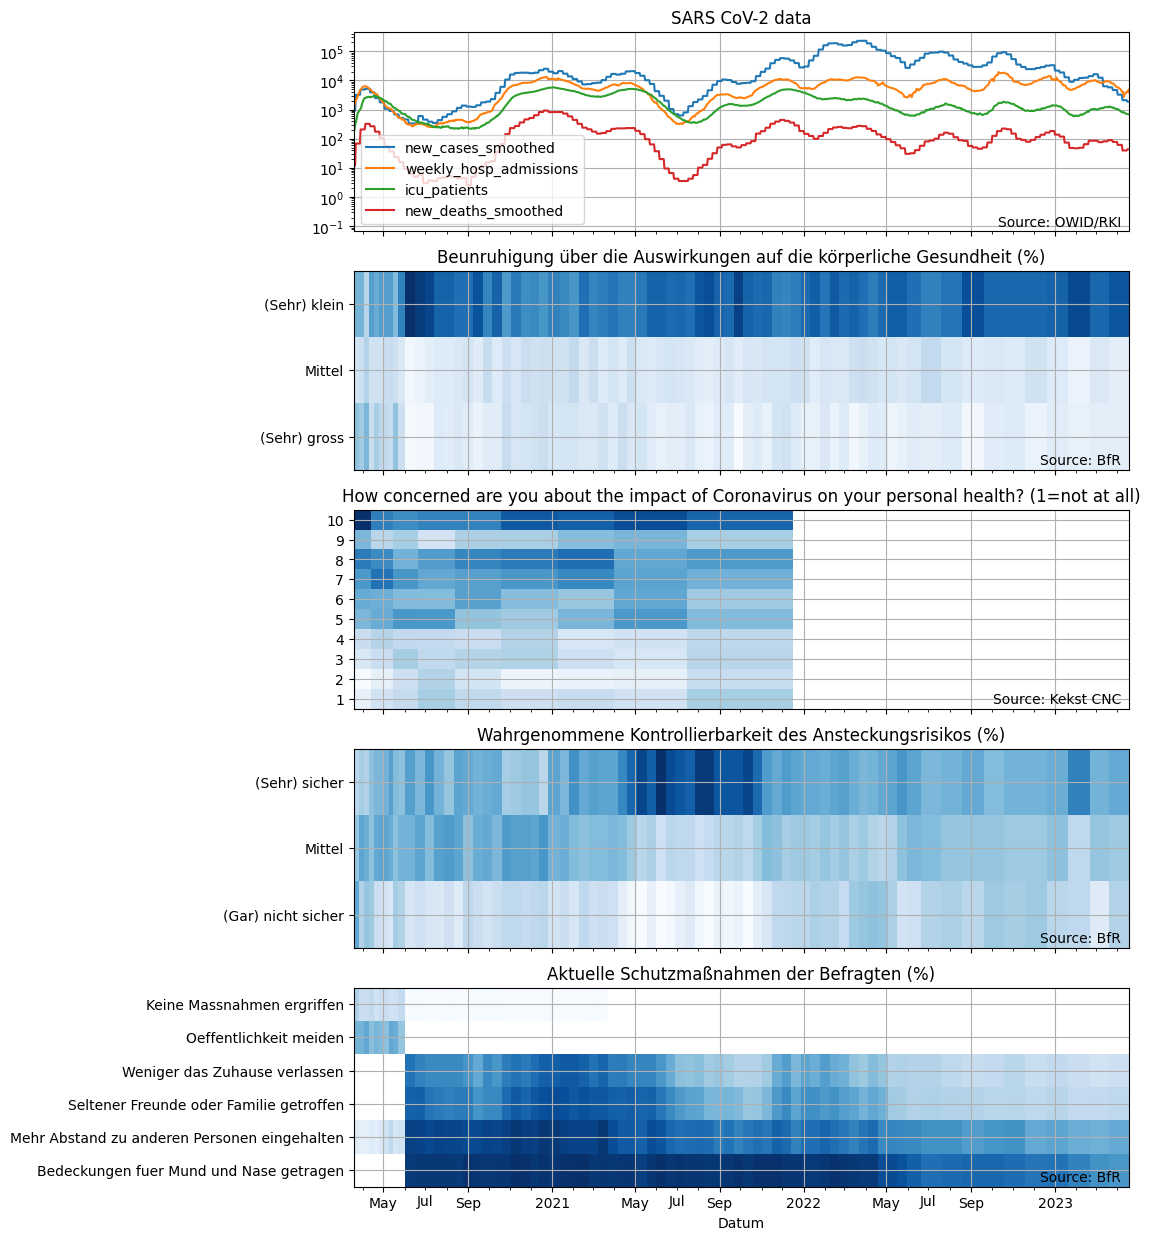

In [6]:
fig, axs = plt.subplots(nrows=5, sharex=True, figsize=(10, 15))

axs[0].set_title("SARS CoV-2 data")
infection_data[infection_data.iso_code =="DEU"][['new_cases_smoothed', 'weekly_hosp_admissions', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
axs[0].text(s='Source: OWID/RKI', x=0.99, y=0.01, transform=axs[0].transAxes, ha='right', va='bottom')

auswirkungen.stack().to_xarray().assign_coords({'level_1': list(range(len(auswirkungen.columns)))}).plot.pcolormesh(x='Datum', ax=axs[1], add_colorbar=False, cmap='Blues')
axs[1].set_yticks(list(range(len(auswirkungen.columns))), auswirkungen.columns)
axs[1].set_title("Beunruhigung über die Auswirkungen auf die körperliche Gesundheit (%)")
axs[1].grid()
axs[1].text(s='Source: BfR', x=0.99, y=0.01, transform=axs[1].transAxes, ha='right', va='bottom')

concern_de_1.stack().to_xarray().assign_coords({'level_1': list(range(len(concern_de_1.columns)))}).plot.pcolormesh(x='Date', ax=axs[2], add_colorbar=False, cmap='Blues')
axs[2].set_yticks(list(range(len(concern_de_1.columns))), concern_de_1.columns)
axs[2].set_title("How concerned are you about the impact of Coronavirus on your personal health? (1=not at all)")
axs[2].grid()
axs[2].text(s='Source: Kekst CNC', x=0.99, y=0.01, transform=axs[2].transAxes, ha='right', va='bottom')

kontrollierbarkeit.stack().to_xarray().assign_coords({'level_1': list(range(len(kontrollierbarkeit.columns)))}).plot.pcolormesh(x='Datum', ax=axs[3], add_colorbar=False, cmap='Blues')
axs[3].set_yticks(list(range(len(kontrollierbarkeit.columns))), kontrollierbarkeit.columns)
axs[3].set_title("Wahrgenommene Kontrollierbarkeit des Ansteckungsrisikos (%)")
axs[3].grid()
axs[3].text(s='Source: BfR', x=0.99, y=0.01, transform=axs[3].transAxes, ha='right', va='bottom')

massnahmen.stack().to_xarray().assign_coords({'level_1': list(range(len(massnahmen.columns)))}).plot.pcolormesh(x='Datum', ax=axs[4], add_colorbar=False, cmap='Blues')
axs[4].set_yticks(list(range(len(massnahmen.columns))), massnahmen.columns)
axs[4].set_title("Aktuelle Schutzmaßnahmen der Befragten (%)")
axs[4].grid()
axs[4].text(s='Source: BfR', x=0.99, y=0.01, transform=axs[4].transAxes, ha='right', va='bottom')

for ax in axs:
    ax.set_ylabel('')

## South Korea

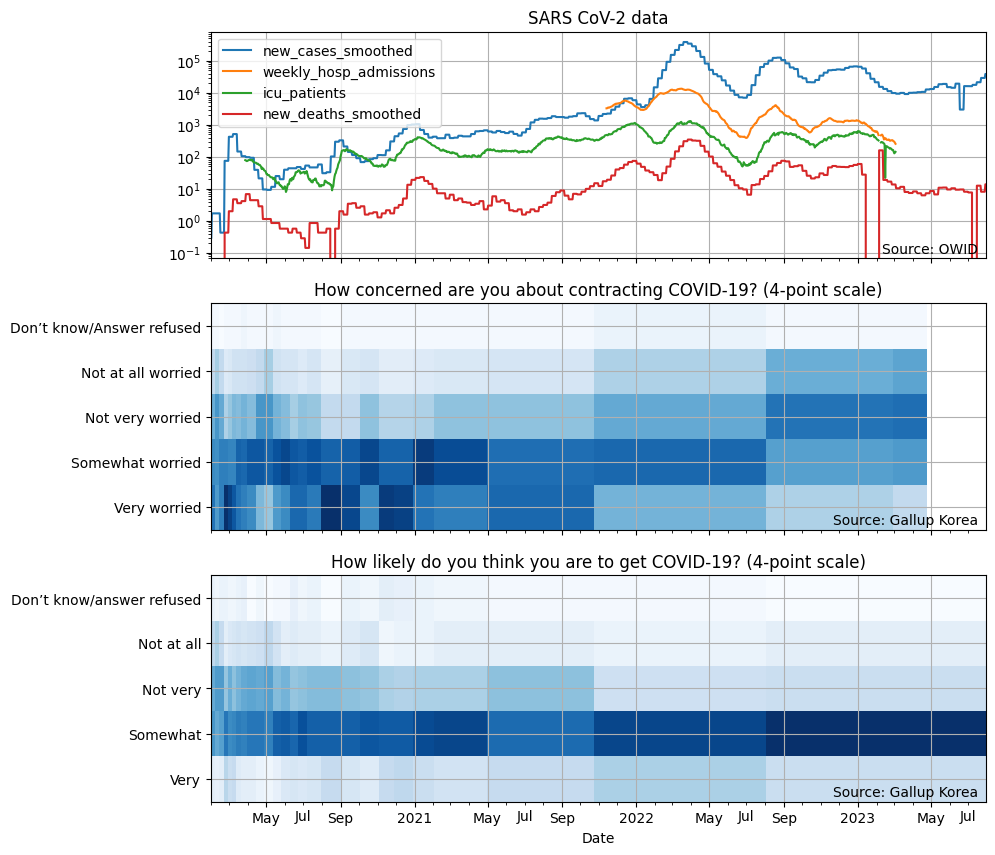

In [7]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 10))

axs[0].set_title("SARS CoV-2 data")
infection_data[infection_data.iso_code=="KOR"][['new_cases_smoothed', 'weekly_hosp_admissions', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
axs[0].text(s='Source: OWID', x=0.99, y=0.01, transform=axs[0].transAxes, ha='right', va='bottom')

concern_kr.stack().to_xarray().assign_coords({'level_1': list(range(5))}).plot.pcolormesh(x='Date', ax=axs[1], add_colorbar=False, cmap='Blues')
axs[1].set_yticks(list(range(5)), concern_kr.columns)
axs[1].set_title("How concerned are you about contracting COVID-19? (4-point scale)")
axs[1].grid()
axs[1].text(s='Source: Gallup Korea', x=0.99, y=0.01, transform=axs[1].transAxes, ha='right', va='bottom')

likelihood_kr.stack().to_xarray().assign_coords({'level_1': list(range(5))}).plot.pcolormesh(x='Date', ax=axs[2], add_colorbar=False,cmap='Blues')
axs[2].set_yticks(list(range(5)), likelihood_kr.columns)
axs[2].set_title("How likely do you think you are to get COVID-19? (4-point scale)")
axs[2].grid()
axs[2].text(s='Source: Gallup Korea', x=0.99, y=0.01, transform=axs[2].transAxes, ha='right', va='bottom')

for ax in axs:
    ax.set_ylabel('')

## United States

In [8]:
situation_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/Gallup_data/Situation-What's your impression of the coronavirus situation in the U.S. today?.csv", index_col=0)
situation_us.index = pd.to_datetime(situation_us.index)
concern_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/US_Public_Concern_About_Catching_Covid19.csv", index_col=0)
concern_us.index = pd.to_datetime(concern_us.index)
normalcy_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/Return_to_Normalcy.csv", index_col=0)
normalcy_us.index = pd.to_datetime(normalcy_us.index)
worry_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/Gallup_data/Worry-How worried are you that you will get the coronavirus?.csv", index_col=0)
worry_us.index = pd.to_datetime(worry_us.index)
protection_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/Gallup_data/Protection-How confident are you that you can protect yourself when out in public from being infected by the coronavirus?.csv", index_col=0)
protection_us.index = pd.to_datetime(protection_us.index)
in_person_contact_us = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/US_Gallup/Gallup_data/In-person contact-Thinking about everything you've done in the past 24 hours, which of the following comes closest to describing your in-person contact with people outside your household?.csv", index_col=0)
in_person_contact_us.index = pd.to_datetime(in_person_contact_us.index)

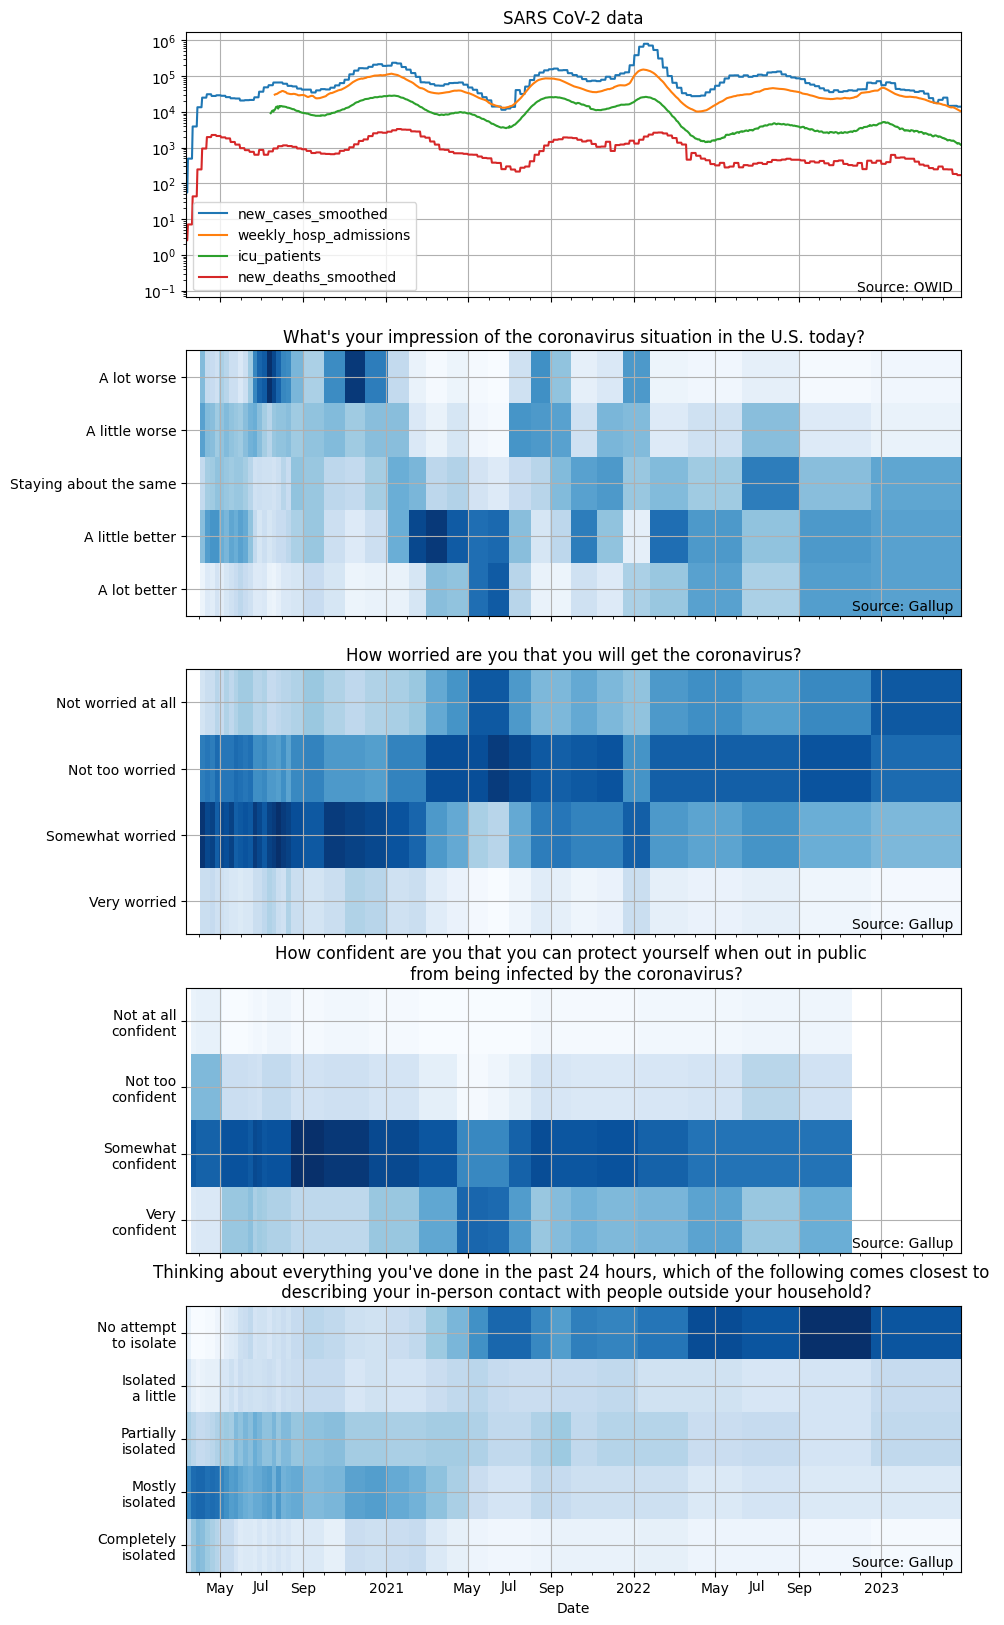

In [9]:
fig, axs = plt.subplots(nrows=5, sharex=True, figsize=(10, 20))

axs[0].set_title("SARS CoV-2 data")
infection_data[infection_data.iso_code=="USA"][['new_cases_smoothed', 'weekly_hosp_admissions', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
axs[0].text(s='Source: OWID', x=0.99, y=0.01, transform=axs[0].transAxes, ha='right', va='bottom')

situation_us.stack().to_xarray().assign_coords({'level_1': list(range(len(situation_us.columns)))}).plot.pcolormesh(x='Date', ax=axs[1], add_colorbar=False,cmap='Blues')
axs[1].set_yticks(list(range(len(situation_us.columns))), situation_us.columns)
axs[1].grid()
axs[1].set_title("What's your impression of the coronavirus situation in the U.S. today?")
axs[1].set_ylabel('')
axs[1].text(s='Source: Gallup', x=0.99, y=0.01, transform=axs[1].transAxes, ha='right', va='bottom')

# worry_us.plot(ax=axs[2])
worry_us.stack().to_xarray().assign_coords({'level_1': list(range(len(worry_us.columns)))}).plot.pcolormesh(x='Date', ax=axs[2], add_colorbar=False, cmap='Blues')
axs[2].set_yticks(list(range(len(worry_us.columns))), worry_us.columns)
axs[2].set_title("How worried are you that you will get the coronavirus?")
axs[2].grid()
axs[2].set_ylabel('')
axs[2].text(s='Source: Gallup', x=0.99, y=0.01, transform=axs[2].transAxes, ha='right', va='bottom')

protection_us.stack().to_xarray().assign_coords({'level_1': list(range(len(protection_us.columns)))}).plot.pcolormesh(x='Date', ax=axs[3], add_colorbar=False, cmap='Blues')
axs[3].grid()
axs[3].set_yticks(list(range(len(protection_us.columns))), protection_us.columns)
axs[3].set_title("How confident are you that you can protect yourself when out in public \n from being infected by the coronavirus?")
axs[3].text(s='Source: Gallup', x=0.99, y=0.01, transform=axs[3].transAxes, ha='right', va='bottom')

in_person_contact_us.stack().to_xarray().assign_coords({'level_1': list(range(len(in_person_contact_us.columns)))}).plot.pcolormesh(x='Date', ax=axs[4], add_colorbar=False, cmap='Blues')
axs[4].grid()
axs[4].set_yticks(list(range(len(in_person_contact_us.columns))), in_person_contact_us.columns)
axs[4].set_title("Thinking about everything you've done in the past 24 hours, which of the following comes closest to \n describing your in-person contact with people outside your household?")
axs[4].text(s='Source: Gallup', x=0.99, y=0.01, transform=axs[4].transAxes, ha='right', va='bottom')

for ax in axs:
    ax.set_ylabel('')

## UK

In [10]:
ons_data_uk = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/UK/ONS/All_data.csv", index_col=0)
ons_data_uk.index = pd.to_datetime(ons_data_uk.index, dayfirst=True)
ons_data_uk = ons_data_uk[ons_data_uk.columns[:-1]]

Text(0.99, 0.01, 'Source: ONS')

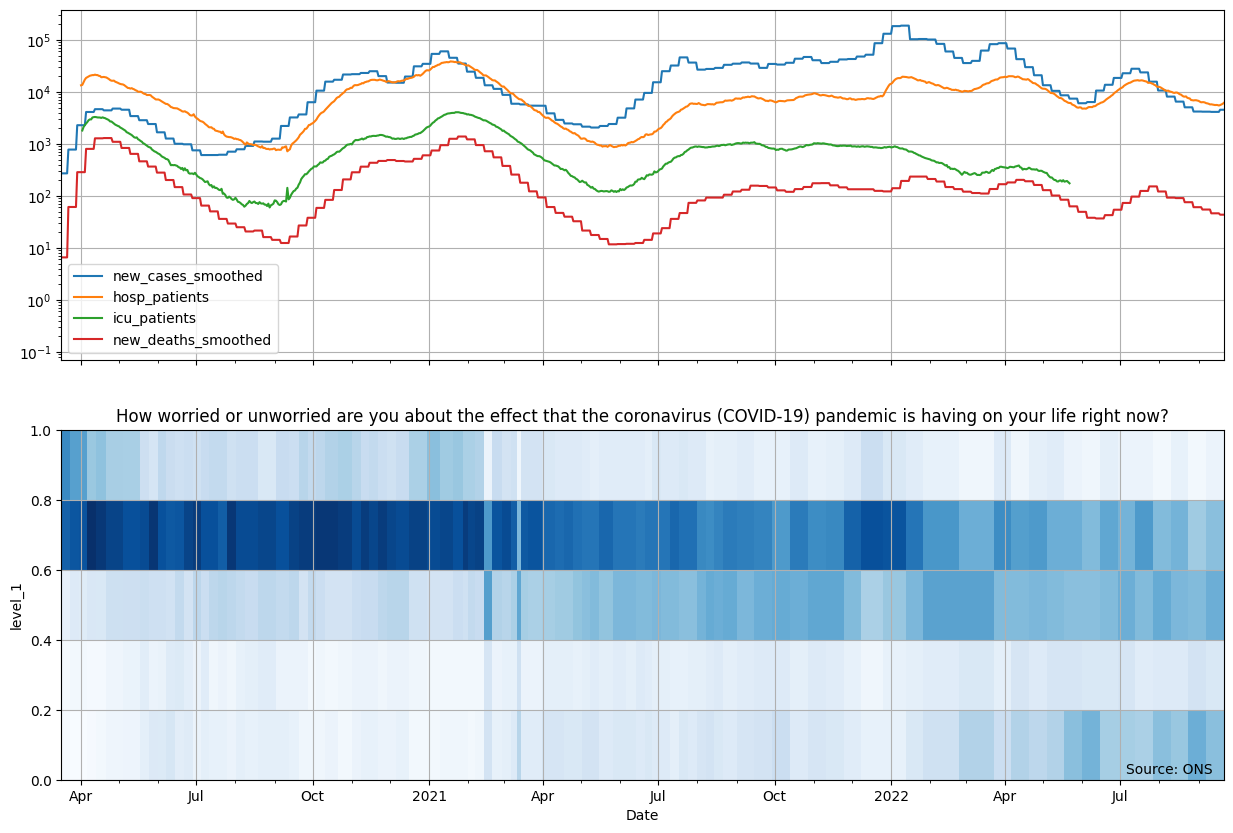

In [11]:
fig, axs = plt.subplots(figsize=(15, 10), nrows=2, sharex=True)
infection_data[infection_data.iso_code=="GBR"][['new_cases_smoothed', 'hosp_patients', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()

pd_to_xr(ons_data_uk).plot.pcolormesh(x='Date', ax=axs[1], add_colorbar=False, cmap='Blues')
axs[1].grid()
axs[1].set_title("How worried or unworried are you about the effect that the coronavirus (COVID-19) pandemic is having on your life right now?")
axs[1].text(s='Source: ONS', x=0.99, y=0.01, transform=axs[1].transAxes, ha='right', va='bottom')

## Japan

In [12]:
concern_jp_1 = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/KekstCNC_Covid_Opinion_Tracker/All_data/Japan_Q1-How concerned are you about the impact of Coronavirus on your personal health? (1=not at all).csv", index_col=0)
concern_jp_1.index = pd.to_datetime(concern_jp_1.index, dayfirst=True, format='mixed')
concern_jp_1 = 100 * concern_jp_1.div(concern_jp_1.sum(axis=1), axis=0)

concern_jp_2 = pd.read_csv(
    "/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/KekstCNC_Covid_Opinion_Tracker/All_data/Japan_Q2-How concerned are you about the impact of Coronavirus on your family's health? (1=not at all).csv",
    index_col=0)
concern_jp_2.index = pd.to_datetime(concern_jp_2.index, dayfirst=True, format='mixed')
concern_jp_2 = 100 * concern_jp_2.div(concern_jp_2.sum(axis=1), axis=0)

pych_state = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Dentsu_Japan/All_data/Psychological state-Please think about how the spread of the new coronavirus has affected your daily life, and choose the one that best applies to your current situation..csv", index_col=0)
pych_state.index = pd.to_datetime(pych_state.index, dayfirst=True, format='mixed')

anxiety_jp = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Cross_Marketing_Japan/All_data/Anxiety-Anxiety level over the past week regarding Covid (1=None) (直近1週間の不安度).csv", index_col=0)
anxiety_jp.index = pd.to_datetime(anxiety_jp.index, dayfirst=True, format='mixed')

stress_jp = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Cross_Marketing_Japan/All_data/Stress-Stress level over the past week regarding Covid (直近１週間のストレス度) (1=None).csv", index_col=0)
stress_jp.index = pd.to_datetime(stress_jp.index, dayfirst=True, format='mixed')

worry_self_jp = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Cross_Marketing_Japan/All_data/Self getting infected-Anxiety about being infected (自分が感染することへの不安).csv", index_col=0)
worry_self_jp.index = pd.to_datetime(worry_self_jp.index, dayfirst=True, format='mixed')

worry_family_jp = pd.read_csv("/Users/thomasgaskin/Opinion_Dynamics_and_Covid/Opinion_data/Cross_Marketing_Japan/All_data/Family member infected-Anxiety about family member getting infected (家族が感染することへの不安).csv", index_col=0)
worry_family_jp.index = pd.to_datetime(worry_family_jp.index, dayfirst=True, format='mixed')

Text(0.99, 0.01, 'Source: Cross Marketing')

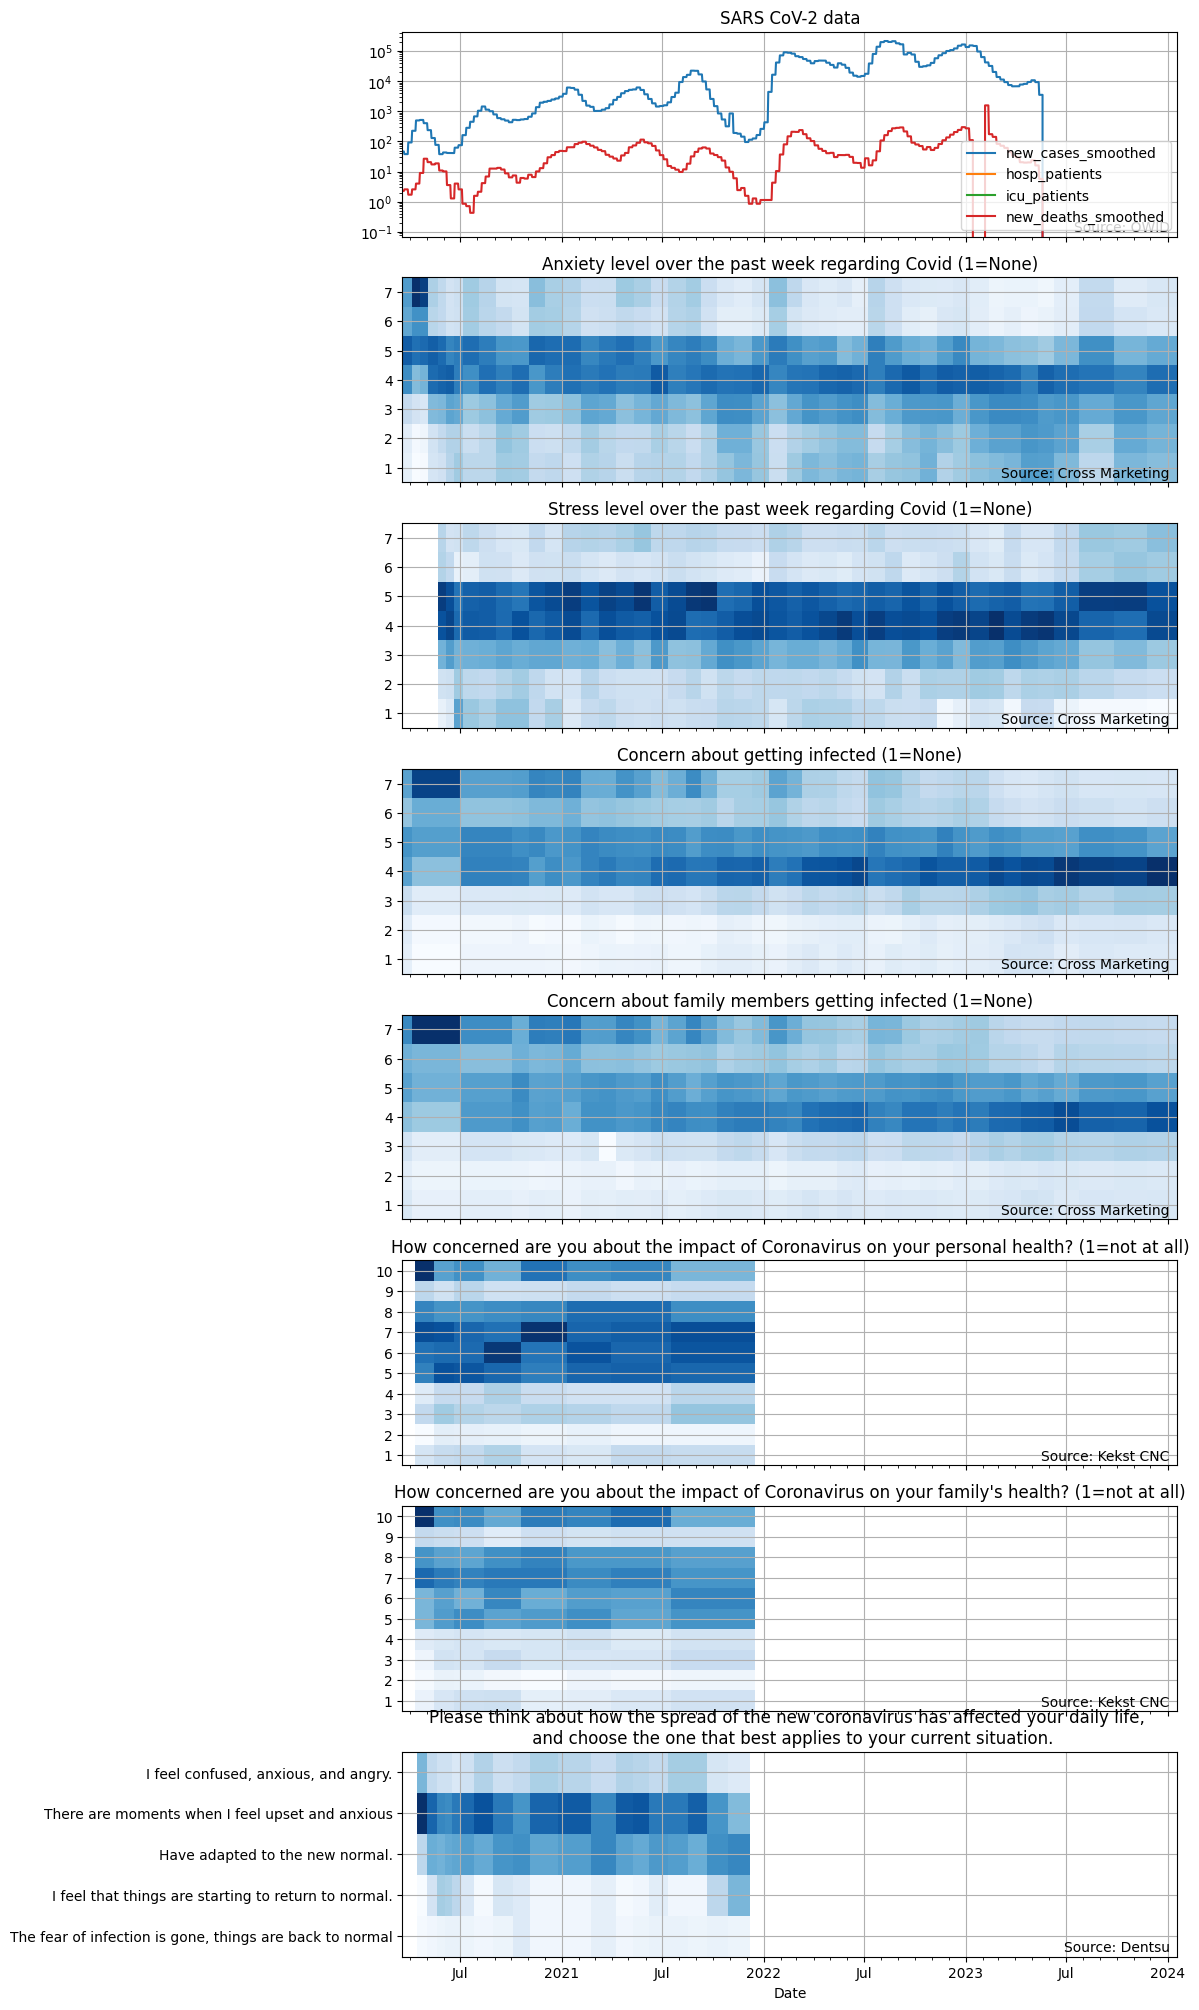

In [13]:
fig, axs = plt.subplots(nrows=8, sharex=True, figsize=(10, 25))

axs[0].set_title("SARS CoV-2 data")
infection_data[infection_data.iso_code=="JPN"][['new_cases_smoothed', 'hosp_patients', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
axs[0].text(s='Source: OWID', x=0.99, y=0.01, transform=axs[0].transAxes, ha='right', va='bottom')

anxiety_jp.stack().to_xarray().assign_coords({'level_1': list(range(len(anxiety_jp.columns)))}).plot.pcolormesh(x='Date', ax=axs[1], add_colorbar=False, cmap='Blues')
axs[1].set_yticks(list(range(len(anxiety_jp.columns))), anxiety_jp.columns)
axs[1].set_ylabel('')
axs[1].grid()
axs[1].set_title("Anxiety level over the past week regarding Covid (1=None)")
axs[1].text(s='Source: Cross Marketing', x=0.99, y=0.01, transform=axs[1].transAxes, ha='right', va='bottom')

stress_jp.stack().to_xarray().assign_coords({'level_1': list(range(len(stress_jp.columns)))}).plot.pcolormesh(x='Date', ax=axs[2], add_colorbar=False, cmap='Blues')
axs[2].set_yticks(list(range(len(stress_jp.columns))), stress_jp.columns)
axs[2].set_ylabel('')
axs[2].grid()
axs[2].set_title("Stress level over the past week regarding Covid (1=None)")
axs[2].text(s='Source: Cross Marketing', x=0.99, y=0.01, transform=axs[2].transAxes, ha='right', va='bottom')

worry_self_jp.stack().to_xarray().assign_coords({'level_1': list(range(len(worry_self_jp.columns)))}).plot.pcolormesh(x='Date', ax=axs[3], add_colorbar=False, cmap='Blues')
axs[3].set_yticks(list(range(len(worry_self_jp.columns))), worry_self_jp.columns)
axs[3].set_ylabel('')
axs[3].grid()
axs[3].set_title("Concern about getting infected (1=None)")
axs[3].text(s='Source: Cross Marketing', x=0.99, y=0.01, transform=axs[3].transAxes, ha='right', va='bottom')

concern_jp_1.stack().to_xarray().assign_coords({'level_1': list(range(len(concern_jp_1.columns)))}).plot.pcolormesh(x='Date', ax=axs[5], add_colorbar=False, cmap='Blues')
axs[5].set_title("How concerned are you about the impact of Coronavirus on your personal health? (1=not at all)")
axs[5].set_yticks(list(range(len(concern_jp_1.columns))), concern_jp_1.columns)
axs[5].set_ylabel('')
axs[5].grid()
axs[5].text(s='Source: Kekst CNC', x=0.99, y=0.01, transform=axs[5].transAxes, ha='right', va='bottom')

concern_jp_2.stack().to_xarray().assign_coords({'level_1': list(range(len(concern_jp_2.columns)))}).plot.pcolormesh(x='Date', ax=axs[6], add_colorbar=False, cmap='Blues')
axs[6].set_title("How concerned are you about the impact of Coronavirus on your family's health? (1=not at all)")
axs[6].set_yticks(list(range(len(concern_jp_2.columns))), concern_jp_2.columns)
axs[6].grid()
axs[6].text(s='Source: Kekst CNC', x=0.99, y=0.01, transform=axs[6].transAxes, ha='right', va='bottom')

pych_state.stack().to_xarray().assign_coords({'level_1': list(range(len(pych_state.columns)))}).plot.pcolormesh(x='Date', ax=axs[7], add_colorbar=False, cmap='Blues')
axs[7].set_title("Please think about how the spread of the new coronavirus has affected your daily life, \n and choose the one that best applies to your current situation.")
axs[7].set_yticks(list(range(len(pych_state.columns))), pych_state.columns)
axs[7].grid()
axs[7].text(s='Source: Dentsu', x=0.99, y=0.01, transform=axs[7].transAxes, ha='right', va='bottom')
for ax in axs:
    ax.set_ylabel('')
    
worry_family_jp.stack().to_xarray().assign_coords({'level_1': list(range(len(worry_family_jp.columns)))}).plot.pcolormesh(x='Date', ax=axs[4], add_colorbar=False, cmap='Blues')
axs[4].set_yticks(list(range(len(worry_family_jp.columns))), worry_family_jp.columns)
axs[4].set_ylabel('')
axs[4].grid()
axs[4].set_title("Concern about family members getting infected (1=None)")
axs[4].text(s='Source: Cross Marketing', x=0.99, y=0.01, transform=axs[4].transAxes, ha='right', va='bottom')

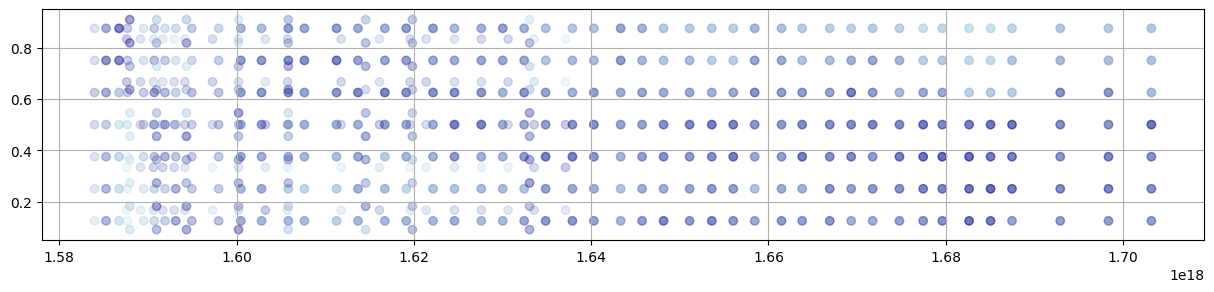

In [14]:
# Combine all Japanese surveys into a single measure
from dantro.plot.utils import ColorManager
cm = ColorManager(
    cmap={'from_values': {0: 'lightblue', 1: 'darkblue'}, 'continuous': True}, vmin=0, vmax=100
)

fig, ax = plt.subplots(figsize=(15, 3))

import numpy as np
for dataset in [anxiety_jp, stress_jp, worry_self_jp, worry_family_jp, concern_jp_1, concern_jp_2, pych_state]:
    ds = dataset.stack().to_xarray().assign_coords({'level_1': np.array(list(range(1, len(dataset.columns)+1))) / (len(dataset.columns)+1)})
    for level in ds.coords['level_1'].data:
        ax.scatter(ds.coords['Date'].astype(float), level * np.ones(len(ds.coords['Date'].data)), c=ds.sel({"level_1": level}).data, cmap=cm.cmap, alpha=0.2)
ax.grid()

In [15]:
x, y, z = [], [], []
for dataset in [anxiety_jp, stress_jp, worry_self_jp, worry_family_jp]:#, concern_jp_1, concern_jp_2, pych_state]:
    ds = dataset.stack().to_xarray().assign_coords({'level_1': np.array(list(range(1, len(dataset.columns)+1))) / (len(dataset.columns)+1)})
    x.append(np.array([len(ds.coords['level_1']) * [_x] for _x in ds.coords['Date'].data]).flatten())
    y.append(np.array(len(ds.coords['Date']) * list(ds.coords['level_1'])).flatten())
    z.append(ds.data.flatten())
    break
x = np.concatenate(x).astype(float)
y = np.concatenate(y)
z = np.concatenate(z)
x *= 1e-18

In [27]:
infection_data[infection_data.iso_code=="JPN"]

,iso_code,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,JPN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2020-01-06,JPN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2020-01-07,JPN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2020-01-08,JPN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2020-01-09,JPN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,JPN,33803572.0,0.0,0.0,74694.0,0.0,0.0,272715.688,0.0,0.0,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2024-03-28,JPN,33803572.0,0.0,0.0,74694.0,0.0,0.0,272715.688,0.0,0.0,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN
2024-03-29,JPN,33803572.0,0.0,0.0,74694.0,0.0,0.0,272715.688,0.0,0.0,...,33.7,NaN,13.05,84.63,0.919,123951696.0,NaN,NaN,NaN,NaN


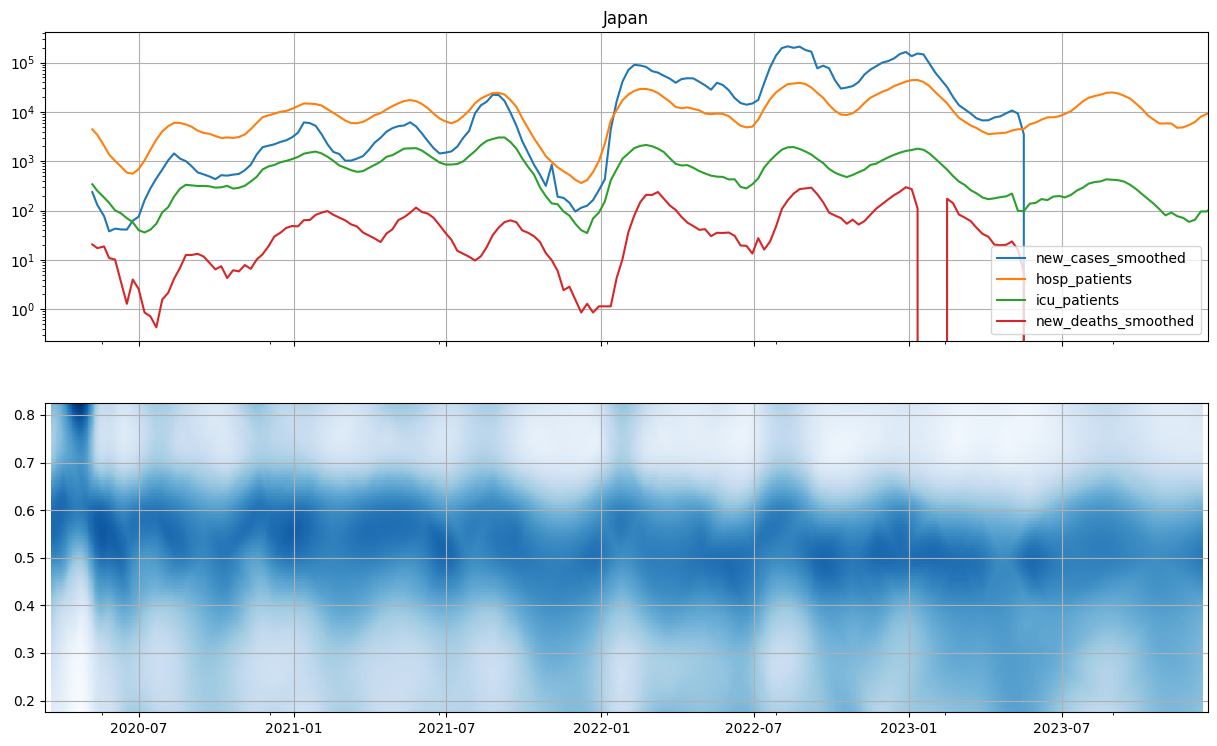

In [37]:
fig, axs = plt.subplots(figsize=(15, 10), nrows=2, sharex=True)
infection_data[infection_data.iso_code=="JPN"][['new_cases_smoothed', 'hosp_patients', 'icu_patients', 'new_deaths_smoothed']].dropna().plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
axs[0].set_title("Japan")

T = scipy.stats.binned_statistic_2d(x, y, z, bins=[100, 7], statistic='mean')
_t = (T.statistic / 100) / np.nansum(T.statistic / 100, axis=1, keepdims=True)
pts = np.meshgrid(0.5*(T.x_edge[1:]+T.x_edge[:-1]), 0.5*(T.y_edge[1:] + T.y_edge[:-1]))
coords = np.stack([pts[0], pts[1]], axis=-1).reshape(-1, 2)
vals = _t.transpose().flatten()
coords = coords[np.where(~np.isnan(vals))]
vals = vals[np.where(~np.isnan(vals))]

idx = np.random.choice(vals.shape[0], 10000)

dates_interp = np.arange(anxiety_jp.index.min(), anxiety_jp.index.max(), np.timedelta64(1, "D"))
X, Y = np.meshgrid(dates_interp.astype(float)*1e-15, 
                   np.linspace(coords.transpose()[1].min(), coords.transpose()[1].max(), 100))  # 2D grid for interpolation

interp = scipy.interpolate.griddata(coords[idx], vals[idx], (X, Y), method='cubic')
axs[1].pcolormesh(dates_interp, Y, interp, cmap='Blues')#, aspect='auto')
axs[1].grid()
axs[0].set_xlim(dates_interp[0], dates_interp[-1])
axs[1].set_xlim(dates_interp[0], dates_interp[-1]);

In [17]:
def reproject(_x, _y, _grid):
    edges = [((_grid[i], _grid[i+1]), []) for i in range(len(_grid)-1)]
    _L = 1/len(_x)
    _bin_edges = np.arange(0, 1+1/len(_x), 1/len(_x))
    
    edge_idx = 0
    data_idx = 0
    
    while edge_idx <= len(edges) - 1 and data_idx <= len(_x) - 1:
        # Limits of old bin
        _x0, _x1 = _bin_edges[data_idx], _bin_edges[data_idx + 1]

        # Limits of new bin
        _a, _b = edges[edge_idx][0]
        
        # Old bin fully contained in new bin:
        if _a <= _x0 and _x1 <= _b:
            overlap = 1
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            data_idx += 1
        
        # New bin fully contained in old bin
        elif _x0 <= _a and _b <= _x1:
            overlap = (_b - _a) / (_x1 - _x0)
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            edge_idx+=1
        
        # New bin partly contained in old bin
        elif _x0 < _a and _b > _x1:
            overlap = (_x1 - _a) / (_x1 - _x0)
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            data_idx += 1
        
        elif _x0 > _a and _b < _x1:
            overlap = (_b - _x0) / (_x1 - _x0)
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            edge_idx += 1
        
        elif _x0 < _a and _x1 < _b:
            overlap = (_x1 - _a) / (_x1 - _x0)
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            data_idx += 1
        
        elif _a < _x0 and _x1 > _b:
            overlap = (_b - _x0) / (_x1 - _x0)
            edges[edge_idx][1].append(_y[data_idx] * overlap)
            edge_idx += 1
    
    return dict((k, np.sum(v)) for k, v in edges)

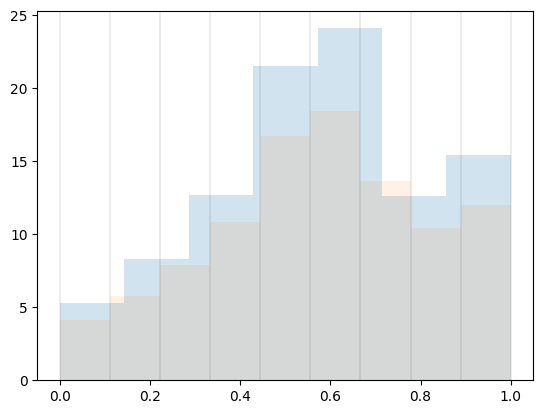

In [18]:
# Reproject onto common grid
grid = np.linspace(0, 1, 10)
ds = anxiety_jp.stack().to_xarray().assign_coords({'level_1': [1/(2*len(anxiety_jp.columns)) + i /len(anxiety_jp.columns) for i in range(len(anxiety_jp.columns))]}).isel({"Date": 0})
_x = ds.coords['level_1'].data
_y = ds.data
edges_new = reproject(_x, _y, grid)
fig, ax = plt.subplots()
ax.bar(_x, _y, (_x[1]-_x[0]) * np.ones_like(_x), alpha=0.2)
ax.bar([k[0] for k in edges_new.keys()], list(edges_new.values()), [k[1]-k[0] for k in edges_new.keys()], alpha=0.1, align='edge')
for g in grid:
    ax.axvline(g, lw=0.1, color='black')

<BarContainer object of 20 artists>

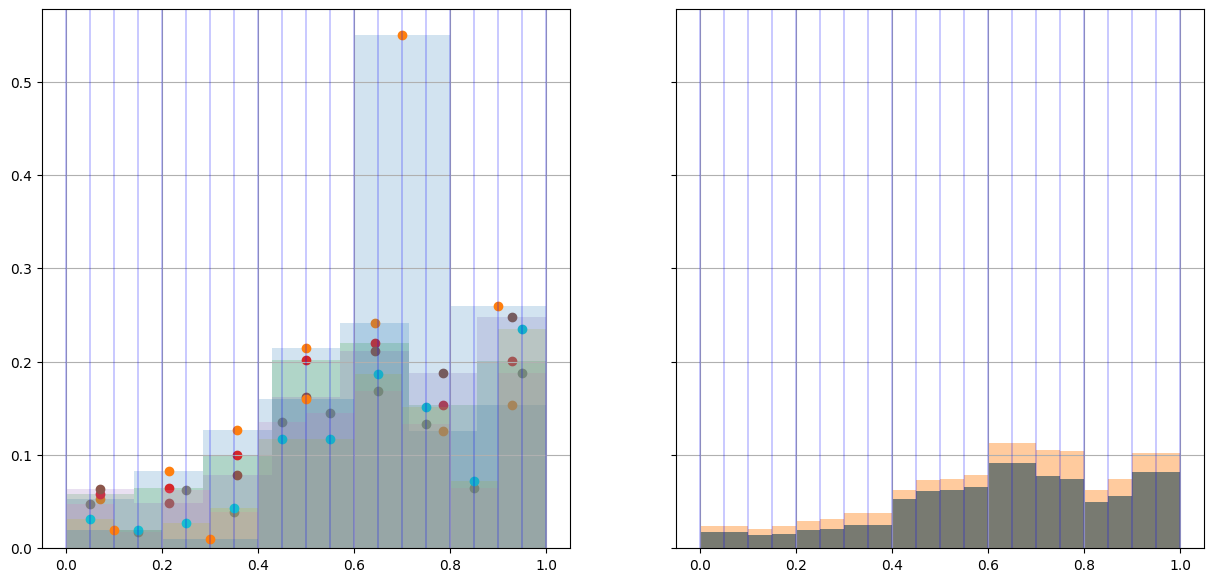

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 7), sharex=True, sharey=True)

# Reproject onto new grid
new_grid = np.linspace(0, 1, 21)
for g in new_grid:
    axs[0].axvline(g, color='blue', lw=0.3)
    axs[1].axvline(g, color='blue', lw=0.3)

axs[0].grid()
axs[1].grid()
means = []
for dataset in [anxiety_jp, worry_self_jp, worry_family_jp, concern_jp_1, concern_jp_2, pych_state]:
    ds = dataset.stack().to_xarray().assign_coords({'level_1': [1/(2*len(dataset.columns)) + i /len(dataset.columns) for i in range(len(dataset.columns))]})
    _x, _y = ds.coords['level_1'].data, ds.isel({"Date": 0}) / 100
    axs[0].bar(_x, _y, width=(_x[1] - _x[0]), alpha=0.2)
    axs[0].scatter(_x, _y)
    
    _y_new = reproject(_x, _y, new_grid)
    means.append(list(_y_new.values()))
    # axs[1].bar(new_grid[:-1], list(_y_new.values()), width=(new_grid[1]-new_grid[0]), align='edge', alpha=0.1)
axs[1].bar(new_grid[:-1], np.array(means).mean(axis=0), width=(new_grid[1]-new_grid[0]), align='edge')
axs[1].bar(new_grid[:-1], np.array(means).mean(axis=0) + np.array(means).std(axis=0), width=(new_grid[1]-new_grid[0]), align='edge', alpha=0.4)

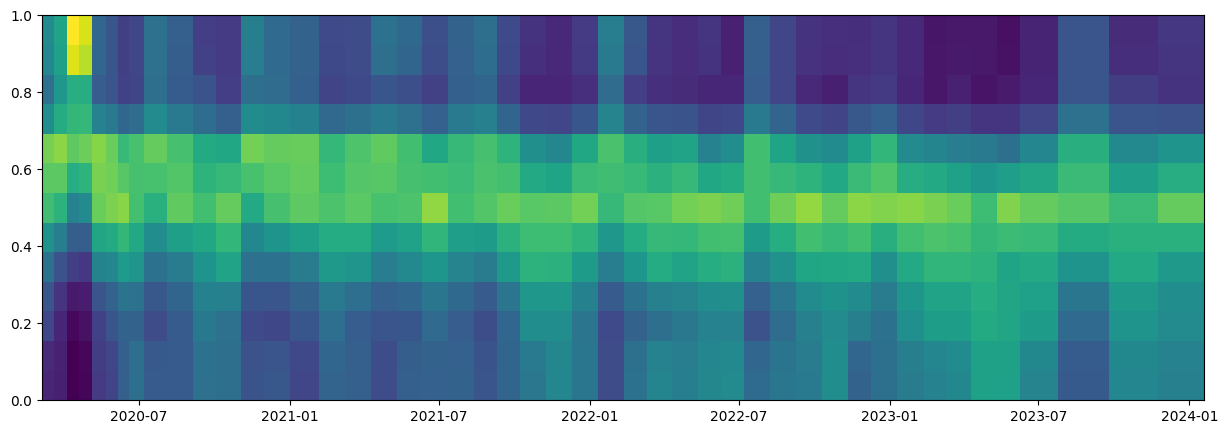

In [20]:
new_grid = np.linspace(0, 1, 14)
res = []
ds = pd_to_xr(anxiety_jp) / 100
_x = ds.coords['level_1'].data
for i in range(len(ds.coords['Date'].data)):
    _y = ds.isel({"Date": i})
    res.append(np.array(list(reproject(_x, _y, new_grid).values())))

fig, ax = plt.subplots(figsize=(15, 5))
ax.pcolormesh(ds.coords['Date'].data, 0.5 * (new_grid[:-1] + new_grid[1:]), np.stack(res).transpose())

In [21]:
# Union of all dates
dates = pd_to_xr(anxiety_jp).coords['Date'].data
for dataset in [stress_jp, worry_self_jp, worry_family_jp, concern_jp_1, concern_jp_2, pych_state]:
    dates = np.union1d(dates, pd_to_xr(dataset).coords['Date'].data)

In [22]:
surveys = xr.DataArray(
    data = np.nan * np.ones((7, len(dates), len(new_grid)-1)), 
    dims = ["Survey", "Date", "Opinion"],
    coords = {
        "Survey": ["Anxiety", "Stress", "Worry_self", "Worry_family", "Worry_self_2", "Worry_family_2", "Psych_state"],
        "Date": dates,
        "Opinion": 0.5 * (new_grid[1:] + new_grid[:-1])
    }
)
for name, dataset in [("Anxiety", anxiety_jp), ("Stress", stress_jp), ("Worry_self", worry_self_jp), ("Worry_family", worry_family_jp), ("Worry_self_2", concern_jp_1), ("Worry_family_2", concern_jp_2), ("Psych_state", pych_state)]:
    ds = pd_to_xr(dataset) / 100
    _x = ds.coords['level_1'].data
    res = []
    for i in range(len(ds.coords['Date'].data)):
        _y = ds.isel({"Date": i})
        res.append(np.array(list(reproject(_x, _y, new_grid).values())))
    surveys.loc[{"Survey": name, "Date": ds.coords['Date'].data, "Opinion": surveys.coords['Opinion'].data}] = np.stack(res)

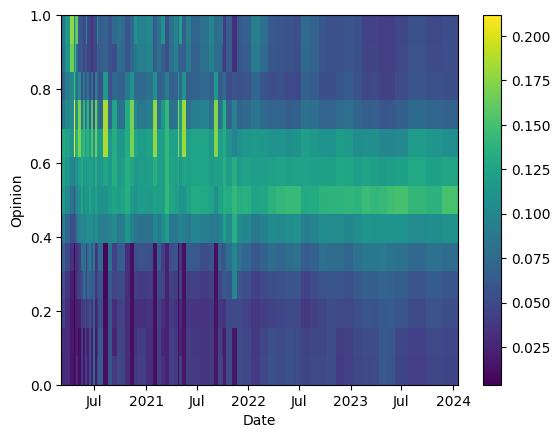

In [23]:
surveys.mean("Survey", skipna=True).plot.pcolormesh(x="Date", y="Opinion")

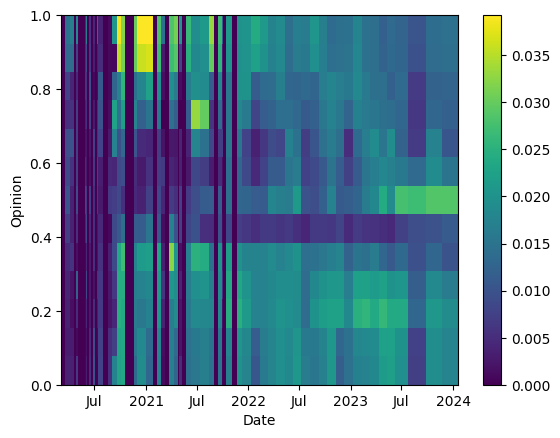

In [24]:
surveys.std("Survey", skipna=True).plot.pcolormesh(x="Date", y="Opinion")

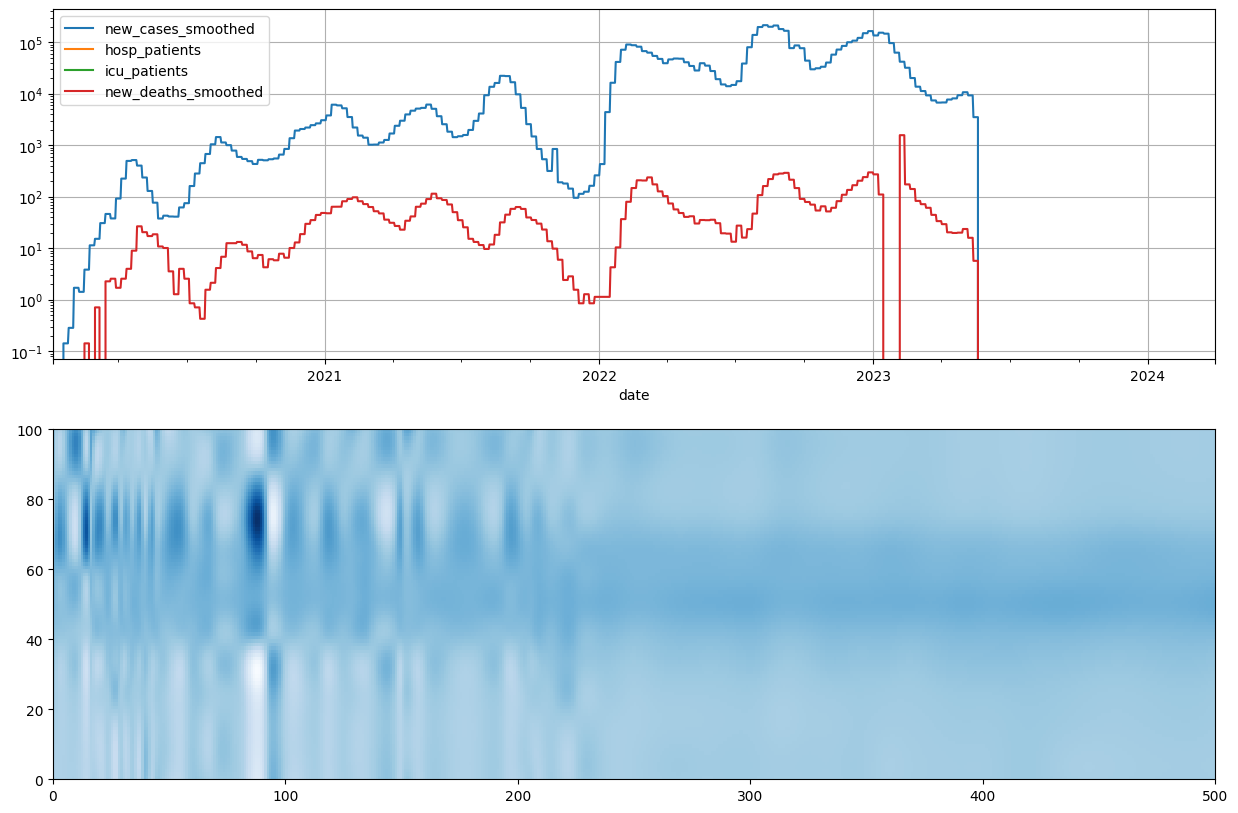

In [25]:
fig, axs = plt.subplots(figsize=(15, 10), nrows=2)
infection_data[infection_data.iso_code=="JPN"][['new_cases_smoothed', 'hosp_patients', 'icu_patients', 'new_deaths_smoothed']].plot.line(ax=axs[0])
axs[0].set_yscale('log')
axs[0].grid()
X, Y = surveys.coords['Date'].data.astype(float) * 1e-18, surveys.coords['Opinion'].data
interp = scipy.interpolate.RegularGridInterpolator((X, Y), surveys.mean("Survey", skipna=True).data, method='cubic')
X_new, Y_new = np.meshgrid(np.linspace(X.min(), X.max(), 500), np.linspace(Y.min(), Y.max(), 100))
axs[1].pcolormesh(interp((X_new, Y_new)), cmap='Blues')#, aspect='auto')